# Media Management Tutorial Exercises

## 1. Data preparation

In [2]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# load in data
data = pd.read_csv("games_may2024_full.csv")

In [3]:
# check variables
data.columns

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')

In [4]:
# check for missing values
def check_na (column):
  return pd.isnull(column).sum()

# check_na is applied to every column of the dataset, the counts are divided by
# the total number of observations (data.shape[0]) to get fractions
data.apply(check_na, axis = 0) / data.shape[0]

,0
AppID,0.000000
name,0.000034
release_date,0.000000
required_age,0.000000
price,0.000000
dlc_count,0.000000
detailed_description,0.047263
about_the_game,0.047514
short_description,0.046614
reviews,0.882537


In [5]:
# we can make it easier to read by rounding the results on 4 digits
round(data.apply(check_na, axis = 0) / data.shape[0], 4)

,0
AppID,0.0000
name,0.0000
release_date,0.0000
required_age,0.0000
price,0.0000
dlc_count,0.0000
detailed_description,0.0473
about_the_game,0.0475
short_description,0.0466
reviews,0.8825


In [6]:
# we can save the result as a dataframe
missing_percentages = pd.DataFrame(round(data.apply(check_na, axis = 0) / data.shape[0], 4))

In [7]:
# you can give the column a nicer name
missing_percentages.columns = ["missing_percent"]

In [8]:
# add the indices as column
missing_percentages["variable"] = missing_percentages.index

In [9]:
# now you can change the indices to numbers
missing_percentages.index = range(missing_percentages.shape[0])

In [10]:
# now we can sort the column with the missing values so we get a better idea
# about the missings
missing_percentages = missing_percentages.sort_values(by = "missing_percent", ascending = False)

# now we have a nice overview over how many missings each variable has

In [11]:
# if we want to deal with the missing values now, there are multiple ways
# for simplicity I would only expect you to delete rows with missings
# (another way would e.g. be imputation)

# first we remove the variables with too many missing values

# we could for example say that variables with more than 10% missings are ok to
# remove, if we do not need these variables
var_to_remove = missing_percentages["variable"][missing_percentages["missing_percent"] > 0.1].tolist()
# now we have a list of variables with a high number of missings, we can check
# this list
var_to_remove

['score_rank',
 'metacritic_url',
 'reviews',
 'notes',
 'website',
 'support_url',
 'support_email']

In [12]:
# none of these variables are relevant for our later tasks, so we can remove
# them
# in general it makes sense to remove all variables that we do not need, but
# for now it is fine to not go through every single variable
# let us remove the variables
data = data.drop(var_to_remove, axis = 1)

In [13]:
# subsequently we remove all rows with missings in this case (in real world
# applications other procedures may make more sense)
# let us also check how many observations we still have
print(data.shape)
data = data.dropna()
print(data.shape)

(87806, 39)
(83630, 39)


In [14]:
# we lost about 4000 rows, given the size of the dataset it is ok for now
# in practice you would discuss more about which variables to keep in general
# and how to deal with missing values

# this is a relatively difficult case of missings, your datasets will be more
# tame in this regard, but you will be able to get information about how to deal
# with a lot of things from this notebook

## 2. Data exploration

In [15]:
# let us get some descriptives
data.shape

(83630, 39)

In [16]:
data.describe()

,AppID,required_age,price,dlc_count,metacritic_score,achievements,recommendations,user_score,positive,negative,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,8.363000e+04,83630.000000,83630.000000,83630.000000,83630.000000,83630.000000,8.363000e+04,83630.000000,8.363000e+04,8.363000e+04,83630.000000,83630.000000,83630.000000,83630.000000,8.363000e+04,83630.000000,8.363000e+04,83630.000000,83630.000000
mean,1.419634e+06,0.282554,7.499821,0.617338,3.480019,20.847626,1.081681e+03,0.037475,1.296633e+03,2.113113e+02,79.542246,3.645343,65.110546,3.763733,9.911890e+01,45.997453,1.413310e+03,5.614899,19.503205
std,7.489998e+05,2.143550,13.103297,15.085990,15.751785,169.000487,2.244809e+04,1.737240,3.064607e+04,5.806672e+03,1018.300541,74.660144,933.325642,82.398545,5.914933e+03,40.606404,3.494519e+04,22.939428,1158.640060
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,7.896300e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.370670e+06,0.000000,4.990000,0.000000,0.000000,4.000000,0.000000e+00,0.000000,1.100000e+01,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,60.000000,1.600000e+01,-1.000000,-1.000000
75%,2.013178e+06,0.000000,9.990000,0.000000,0.000000,20.000000,0.000000e+00,0.000000,6.400000e+01,1.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,85.000000,8.700000e+01,-1.000000,-1.000000
max,2.984570e+06,21.000000,999.980000,3165.000000,97.000000,9821.000000,4.111974e+06,100.000000,7.024836e+06,1.029779e+06,95816.000000,6836.000000,110101.000000,9874.000000,1.362469e+06,100.000000,8.071426e+06,100.000000,321958.000000


In [17]:
data.dtypes

,0
AppID,int64
name,object
release_date,object
required_age,int64
price,float64
dlc_count,int64
detailed_description,object
about_the_game,object
short_description,object
header_image,object


<Axes: >

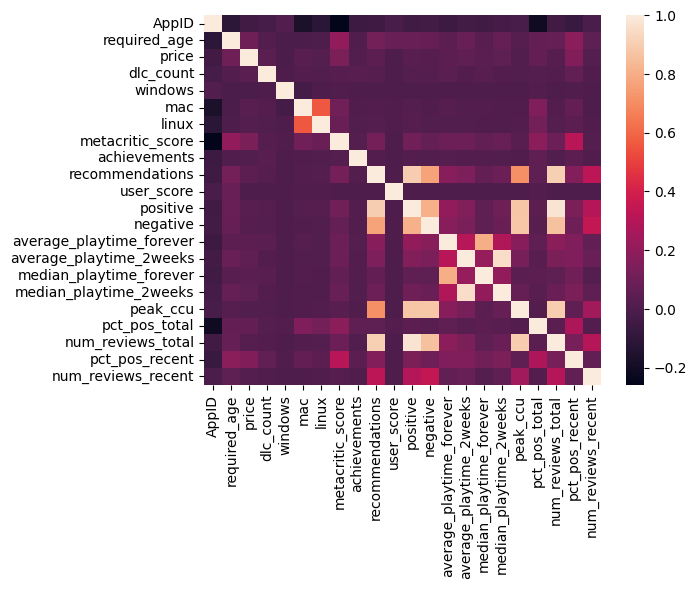

In [18]:
# correlation plot
data_cor = data.corr(numeric_only = True)
sns.heatmap(data_cor)

## Task 1: Show recent developments in gaming by filtering the data for recent games and plotting the metacritic scores on a timeline. Can you make out a trend? Discuss!

In [19]:
# filter dataset for recent games, let's say from 2020 onwards
data["release_date"].describe()

,release_date
count,83630
unique,4503
top,2024-03-28
freq,114


In [20]:
# transform date-variable to date-datatype
from datetime import datetime

data["release_date"] = data["release_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [21]:
# filter for video games that released from 2020 onwards
data_task_1 = data[data["release_date"] >= "2020-01-01"]

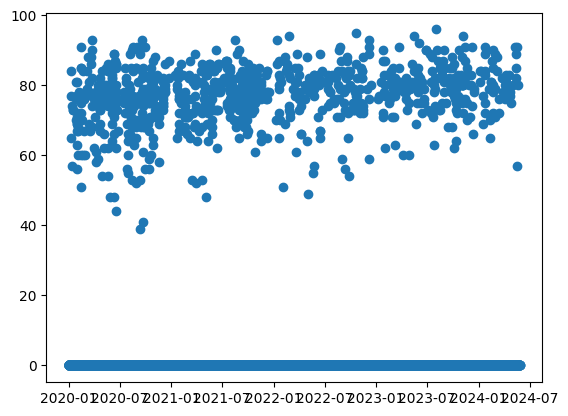

In [22]:
# plot the metacritic scores over time
plt.scatter(data_task_1["release_date"], data_task_1["metacritic_score"])

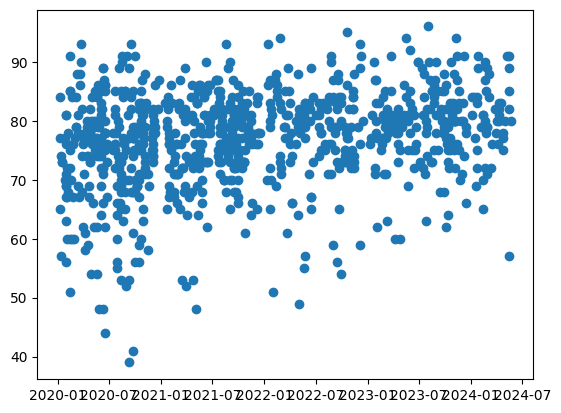

In [23]:
data_task_1_filtered = data_task_1[data_task_1["metacritic_score"] != 0]
plt.scatter(data_task_1_filtered["release_date"], data_task_1_filtered["metacritic_score"])

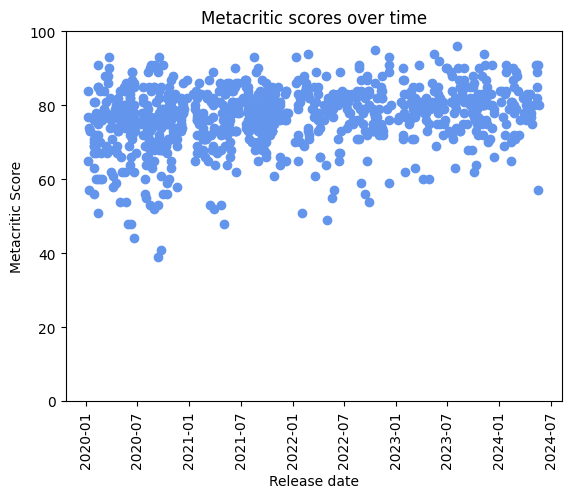

In [24]:
# make the graph nicer
fig, ax = plt.subplots()
ax.scatter(data_task_1_filtered["release_date"], data_task_1_filtered["metacritic_score"],
           color = "cornflowerblue")
ax.set_title("Metacritic scores over time")
ax.set_ylim(0, 100)
plt.xlabel("Release date")
plt.ylabel("Metacritic Score")
plt.xticks(rotation = 90)
plt.show()

## Task 2: Conduct a regression analysis with metacritic_score as the independent variable and recommendations as the dependent variable. Interpret the results. Do consumers have "good taste"? Discuss!

In [28]:
# univariate regression of metacritic score on recommendations
X = pd.DataFrame(data_task_1_filtered["metacritic_score"])
y = pd.DataFrame(data_task_1_filtered["recommendations"])


reg_1 = sm.OLS(y, X).fit()
print(reg_1.summary())

                                 OLS Regression Results                                
Dep. Variable:        recommendations   R-squared (uncentered):                   0.075
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              70.94
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                    1.49e-16
Time:                        12:17:57   Log-Likelihood:                         -10722.
No. Observations:                 881   AIC:                                  2.145e+04
Df Residuals:                     880   BIC:                                  2.145e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [30]:
# add more variables to try to explain the number of recommendations a game receives
X["num_reviews_total"] = data_task_1_filtered["num_reviews_total"]

reg_2 = sm.OLS(y, X).fit()
print(reg_2.summary())

                                 OLS Regression Results                                
Dep. Variable:        recommendations   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              1334.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                   4.99e-267
Time:                        12:20:12   Log-Likelihood:                         -10142.
No. Observations:                 881   AIC:                                  2.029e+04
Df Residuals:                     879   BIC:                                  2.030e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [31]:
X = pd.DataFrame(data_task_1_filtered["price"])

reg_3 = sm.OLS(y, X).fit()
print(reg_3.summary())

                                 OLS Regression Results                                
Dep. Variable:        recommendations   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.100
Method:                 Least Squares   F-statistic:                              98.98
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                    3.59e-22
Time:                        12:23:10   Log-Likelihood:                         -10709.
No. Observations:                 881   AIC:                                  2.142e+04
Df Residuals:                     880   BIC:                                  2.143e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
X["num_reviews_total"] = data_task_1_filtered["num_reviews_total"]

reg_4 = sm.OLS(y, X).fit()
print(reg_4.summary())

                                 OLS Regression Results                                
Dep. Variable:        recommendations   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                              1370.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                   7.17e-271
Time:                        12:23:33   Log-Likelihood:                         -10133.
No. Observations:                 881   AIC:                                  2.027e+04
Df Residuals:                     879   BIC:                                  2.028e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [33]:
"""we can see the effect of price gets smaller when we include num_reviews_total
as proxy for number of purchases, since number of purchases is not in the
data... the effect of price might even disapear entirely if we had the number of
purchases as a variable"""
X["median_playtime_forever"] = data_task_1_filtered["median_playtime_forever"]

reg_5 = sm.OLS(y, X).fit()
print(reg_5.summary())

                                 OLS Regression Results                                
Dep. Variable:        recommendations   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              922.3
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                   8.55e-271
Time:                        12:24:23   Log-Likelihood:                         -10129.
No. Observations:                 881   AIC:                                  2.026e+04
Df Residuals:                     878   BIC:                                  2.028e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------